<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Logistic_Regression_in_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.49
ROC-AUC Score: 0.46
Confusion Matrix:
[[91 63]
 [90 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       154
           1       0.47      0.38      0.42       146

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.49      0.48       300

Feature Coefficients:
Cholesterol: -0.0607
Age: 0.1331
Blood_Pressure: 0.0545
Intercept: -0.0345


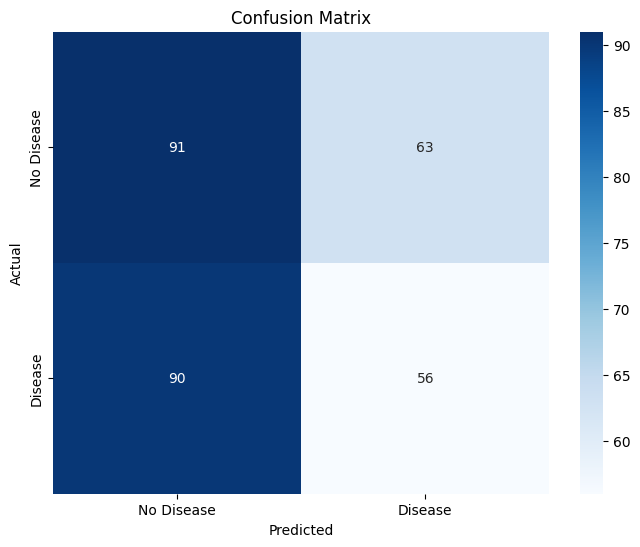

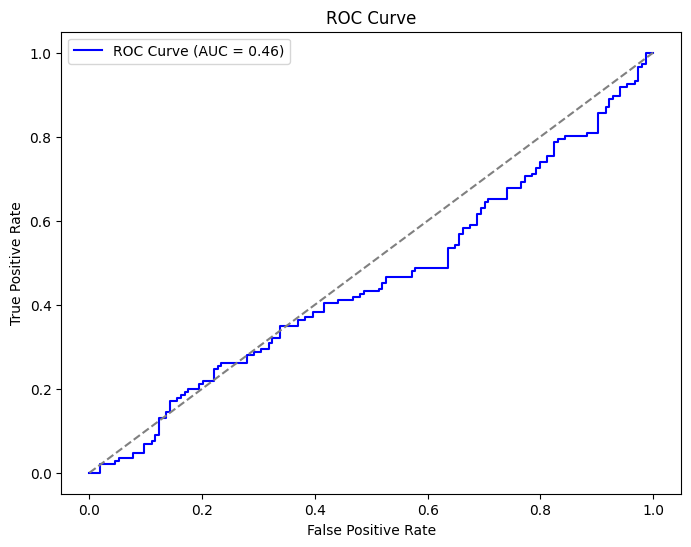

In [1]:
import pandas as pd  # I must rely on pandas to organize and manipulate the data in an orderly manner, ensuring clarity and ease of analysis.
import numpy as np  # Utilizing numpy as my ally in handling numerical computations, which are bound to emerge during logistic regression.
from sklearn.model_selection import train_test_split  # To properly divide the data into training and testing sets, ensuring the model generalizes well.
from sklearn.linear_model import LogisticRegression  # Employing logistic regression, my chosen method for predicting binary outcomes such as disease presence.
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report  # Metrics to gauge the performance of the model and to interpret its predictive capabilities.
import matplotlib.pyplot as plt  # For visualizing model performance
import seaborn as sns  # For creating appealing and informative plots

# Creating a regular dataset to ensure all classes are represented
np.random.seed(42)  # Setting a seed for reproducibility
num_samples = 1000  # Using a smaller dataset for better clarity

# Simulating features for the dataset
cholesterol = np.random.normal(200, 30, num_samples)  # Cholesterol levels around a mean of 200 mg/dL
age = np.random.normal(50, 10, num_samples)  # Ages centered around 50 years
blood_pressure = np.random.normal(120, 15, num_samples)  # Blood pressure centered around 120 mmHg

# Generating binary target variable with a balanced distribution
disease_present = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])  # Ensuring a 50-50 split between classes

data = pd.DataFrame({
    'Cholesterol': cholesterol,
    'Age': age,
    'Blood_Pressure': blood_pressure,
    'Disease_Present': disease_present
})

# Defining features (X) and target (y)
X = data.drop("Disease_Present", axis=1)  # Carefully selecting features while excluding the target variable
y = data["Disease_Present"]  # Isolating the binary target variable to predict disease presence

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # The 70-30 split feels reasonable to balance training and testing

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # The training data is standardized to ensure consistent scaling
X_test = scaler.transform(X_test)  # Applying the same transformation to the test data keeps the scale uniform

# Initializing and fitting the logistic regression model
model = LogisticRegression(max_iter=1000)  # Setting a high iteration limit to ensure convergence for larger datasets
model.fit(X_train, y_train)  # Fitting the model to learn relationships between predictors and binary outcomes

# Evaluating the model's performance
predictions = model.predict(X_test)  # Binary predictions to indicate disease presence
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilistic predictions offer nuanced insights

# Accuracy
accuracy = accuracy_score(y_test, predictions)  # A straightforward metric measuring the proportion of correct predictions
print(f"Accuracy: {accuracy:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, probabilities)  # Evaluates the model's ability to discriminate between classes
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)  # Examining the distribution of true positives, false positives, etc.
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification Report
class_report = classification_report(y_test, predictions)  # Provides precision, recall, and F1-score for each class
print(f"Classification Report:\n{class_report}")

# Interpreting the coefficients and intercept
coefficients = model.coef_[0]  # Extracting coefficients to understand feature impacts
intercept = model.intercept_[0]  # Establishing the baseline log-odds for the model

print("Feature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")  # Articulating the impact of each feature on the log-odds of the outcome

print(f"Intercept: {intercept:.4f}")  # The intercept anchors the model's probability predictions

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualizing ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
